# Airport Delay Analysis

In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(dplyr)
library(tidymodels)
library(tidyr)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

***IMPORTANT FOR TAs***<br>
***!!PLEASE READ BEFORE PROCEED!!*** <br>
**The following two cells will not run on server!**<br>
Due to the size of dataset, the server will automaticaly stop as we reached its maximum RAM quota. Hence, the following two cells will not run on the server, but will run locally. The two cells demostrated how we filter our dataset into a smaller and more workable size, and writing it into a csv so we could load it into R on the server. <br>
The dataset was originally from Kaggle https://www.kaggle.com/usdot/flight-delays?select=flights.csv and was re-uploaded to OneDrive so R can direct download it. <br>
We then uploaded the created `flight.csv` file onto OneDrive again for future cells, so please reference these cells as demo for that.

In [2]:
#PLEASE DO NOT RUN THIS CELL ON SERVER

# download.file("https://onedrive.live.com/download?cid=388613CB66488271&resid=388613CB66488271%211938&authkey=AP68YxTYtqW--dk", "flights.csv") #download file
# flight <- read_csv("flights.csv") %>%
#         filter(ORIGIN_AIRPORT == "LAX")  #filter original airport to LAX only

# flight

In [3]:
#PLEASE DO NOT RUN THIS CELL ON SERVER
# write.csv(flight, "flight2.csv", row.names=FALSE) #write the filtered dataset into a csv so we can load it on the server later

## Introduction
In this report, the sample data we are using contains statistics of the on-time performance for  domestic flights in 2015, operated by large air carriers in the USA.  The sample data is sourced from https://www.kaggle.com/usdot/flight-delays, and is published by the U.S Department of Transportation.  The main goal of our project is to determine if it is possible to predict the likelihood of a flight departing Los Angeles International Airport (LAX) being delayed, with predictor variables including the season of the year, day of the week and time of the departure.


**The following cell is runable anywhere** <br>
This cell downloads data that has been filtered locally then uploaded to OneDrive. Hence, please run **EITHER** the above 2 cells, **OR** this following cell. 

In [2]:
download.file("https://onedrive.live.com/download?cid=388613CB66488271&resid=388613CB66488271%211940&authkey=ANvJlPL9F5BDo54", "flight2.csv")
# this download link contains the flight2.csv file that was locally shrinked by steps shown above, then RE-UPLOADED to OneDrive so that this notebook runs without external files
flight <- read_csv("flight2.csv")
flight

Parsed with column specification:
cols(
  .default = col_double(),
  AIRLINE = col_character(),
  TAIL_NUMBER = col_character(),
  ORIGIN_AIRPORT = col_character(),
  DESTINATION_AIRPORT = col_character(),
  SCHEDULED_DEPARTURE = col_character(),
  DEPARTURE_TIME = col_character(),
  WHEELS_OFF = col_character(),
  WHEELS_ON = col_character(),
  SCHEDULED_ARRIVAL = col_character(),
  ARRIVAL_TIME = col_character(),
  CANCELLATION_REASON = col_character()
)

See spec(...) for full column specifications.



YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,⋯,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,⋯,0741,-9,0,0,NA,NA,NA,NA,NA,NA
2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,⋯,0756,-9,0,0,NA,NA,NA,NA,NA,NA
2015,1,1,4,US,2013,N584UW,LAX,CLT,0030,⋯,0753,-10,0,0,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2015,12,31,4,AS,471,N570AS,LAX,SEA,2355,⋯,0225,-19,0,0,NA,NA,NA,NA,NA,NA
2015,12,31,4,AA,219,N3LYAA,LAX,ORD,2359,⋯,0544,-19,0,0,NA,NA,NA,NA,NA,NA
2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,⋯,0753,-26,0,0,NA,NA,NA,NA,NA,NA


<h3> Data Pre-processing <h3>

In [3]:
set.seed(100)
#As we wanted to predict weather a flight is going to be delayed, we don't want the delayed reasons for each flight, we also want to mutate ARRIVAL_DELAY into a binary for classification
flights <- flight %>%
        select(-DIVERTED, -CANCELLED, -CANCELLATION_REASON, -AIR_SYSTEM_DELAY, -SECURITY_DELAY, -AIRLINE_DELAY, -LATE_AIRCRAFT_DELAY, -WEATHER_DELAY) %>%
        drop_na()%>%
        mutate(DELAY_STATUS = ifelse(ARRIVAL_DELAY >= 0, "Delayed", "Not Delayed")) %>%
        mutate(DELAY_STATUS = fct_rev(as_factor(DELAY_STATUS))) %>%
        mutate(DESTINATION_AIRPORT = as_factor(DESTINATION_AIRPORT)) %>%
        select(-ARRIVAL_DELAY) %>% #after mutating ARRIVAL_DELAY into binary, we need to delete this col as it's no longer useful -- we can't use predictant as predictor
        mutate(SEASON = as_factor(ifelse(MONTH %in% 3:5, "Spring",        #mutate months into seasons
                               ifelse(MONTH %in% 6:8, "Summer",
                                      ifelse(MONTH %in% 9:11, "Fall",
                                             "Winter"))))) %>%
        mutate(WEEKDAY = as_factor(ifelse(DAY_OF_WEEK < 5, "Weekday", "Weekend"))) %>%  #mutate DAY_OF_WEEK into Weekday and Weekend
        mutate(SCHEDULED_DEPARTURE = as.double(SCHEDULED_DEPARTURE)) %>%   #first change SCHEDULED_DEPARTURE from chr into dbl for next step
        mutate(DEPARTURE_PART_OF_DAY = as_factor(ifelse(SCHEDULED_DEPARTURE %in% 600:1159, "Morning",        #mutate SCHEDULED_DEPARTURE into Morning, Afternoon, Evening and Midnight
                                                        ifelse(SCHEDULED_DEPARTURE %in% 1200:1759, "Afternoon",
                                                              ifelse(SCHEDULED_DEPARTURE %in% 1800:2359, "Evening",
                                                                         "Midnight"))))) %>%
        sample_n(15000) # we sampled 15000 examples out of our data set, as the server just refuse to take any larger amount of processing. Our model takes around 15 minutes to run even after this.
        
flights

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,⋯,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DELAY_STATUS,SEASON,WEEKDAY,DEPARTURE_PART_OF_DAY
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<fct>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>
2015,5,26,2,AA,1154,N3DHAA,LAX,MIA,2345,⋯,271,2342,0742,5,0740,0747,Delayed,Spring,Weekday,Evening
2015,5,4,1,US,598,N193UW,LAX,PHL,621,⋯,299,2402,1429,7,1436,1436,Delayed,Spring,Weekday,Morning
2015,11,8,7,AA,2404,N863AA,LAX,DFW,500,⋯,145,1235,0934,8,1001,0942,Not Delayed,Fall,Weekend,Midnight
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2015,3,19,4,WN,360,N8649A,LAX,OAK,1830,⋯,55,337,1928,5,1945,1933,Not Delayed,Spring,Weekday,Evening
2015,5,23,6,OO,2870,N955SW,LAX,FAT,935,⋯,38,209,1031,4,1036,1035,Not Delayed,Spring,Weekend,Morning
2015,1,17,6,DL,16,N194DN,LAX,JFK,910,⋯,272,2475,1657,3,1738,1700,Not Delayed,Winter,Weekend,Morning


**REASON FOR THE MUTATIONS** <br>
Here we mutated month into seasons, days into weekday/weekend and time into morning/afternoon/evening/midnight as factors so that we can do better analysis on the dataset. It will also help our model in the near future as less but stronger factors in predictors help KNN calculate distance better, hence yielding a more accurate and efficient model.

In [4]:
set.seed(101)
#train test split with 70% as normal practice. We do have a lot of data(190k rows) so we don't need to worry about train set size.
flights_split <- initial_split(flights, prop = 0.7, strata = DELAY_STATUS)  
flights_train <- training(flights_split)   
flights_test <- testing(flights_split)

flights_train
flights_test

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,⋯,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DELAY_STATUS,SEASON,WEEKDAY,DEPARTURE_PART_OF_DAY
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<fct>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>
2015,5,26,2,AA,1154,N3DHAA,LAX,MIA,2345,⋯,271,2342,0742,5,0740,0747,Delayed,Spring,Weekday,Evening
2015,11,8,7,AA,2404,N863AA,LAX,DFW,500,⋯,145,1235,0934,8,1001,0942,Not Delayed,Fall,Weekend,Midnight
2015,6,8,1,AA,1307,N3LDAA,LAX,ORD,1310,⋯,210,1744,1903,12,1924,1915,Not Delayed,Summer,Weekday,Afternoon
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2015,3,19,4,WN,360,N8649A,LAX,OAK,1830,⋯,55,337,1928,5,1945,1933,Not Delayed,Spring,Weekday,Evening
2015,5,23,6,OO,2870,N955SW,LAX,FAT,935,⋯,38,209,1031,4,1036,1035,Not Delayed,Spring,Weekend,Morning
2015,1,17,6,DL,16,N194DN,LAX,JFK,910,⋯,272,2475,1657,3,1738,1700,Not Delayed,Winter,Weekend,Morning


YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,⋯,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DELAY_STATUS,SEASON,WEEKDAY,DEPARTURE_PART_OF_DAY
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<fct>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>
2015,5,4,1,US,598,N193UW,LAX,PHL,621,⋯,299,2402,1429,7,1436,1436,Delayed,Spring,Weekday,Morning
2015,1,16,5,OO,2623,N866AS,LAX,SAN,745,⋯,26,109,0815,4,0832,0819,Not Delayed,Winter,Weekend,Morning
2015,3,21,6,AA,2463,N5DVAA,LAX,DFW,1855,⋯,148,1235,2341,4,2349,2345,Not Delayed,Spring,Weekend,Evening
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2015,2,3,2,WN,2685,N605SW,LAX,MKE,1005,⋯,214,1756,1611,5,1600,1616,Delayed,Winter,Weekday,Morning
2015,3,31,2,OO,6296,N794SK,LAX,DFW,1911,⋯,151,1235,0010,4,0016,0014,Not Delayed,Spring,Weekday,Evening
2015,3,30,1,US,503,N831AW,LAX,PHX,720,⋯,57,370,0835,43,0905,0918,Delayed,Spring,Weekday,Morning


<h3> Data Summary <h3>

In [34]:
summerization <- data.frame("Summer" = nrow(filter(flights_train, SEASON == "Summer")), 
                           "Winter" = nrow(filter(flights_train,  SEASON == "Winter")), 
                           "Fall" = nrow(filter(flights_train, SEASON == "Fall")),
                           "Spring" = nrow(filter(flights_train,  SEASON == "Spring")))
summerization<- summerization%>%
                pivot_longer(cols =  Summer : Spring,
                             names_to ="Season",
                             values_to = "Number_of_Airplanes")
summerization
summerization_proportion<- summerization%>%
                           mutate( proportion = Number_of_Airplanes/ nrow(flights_train))
summerization_proportion

Season,Number_of_Airplanes
<chr>,<int>
Summer,3075
Winter,2653
Fall,1923
Spring,2850


Season,Number_of_Airplanes,proportion
<chr>,<int>,<dbl>
Summer,3075,0.2928293
Winter,2653,0.2526426
Fall,1923,0.1831254
Spring,2850,0.2714027


<h3> Data Visualization <h3>

`summarise()` regrouping output by 'DELAY_STATUS', 'DEPARTURE_PART_OF_DAY' (override with `.groups` argument)



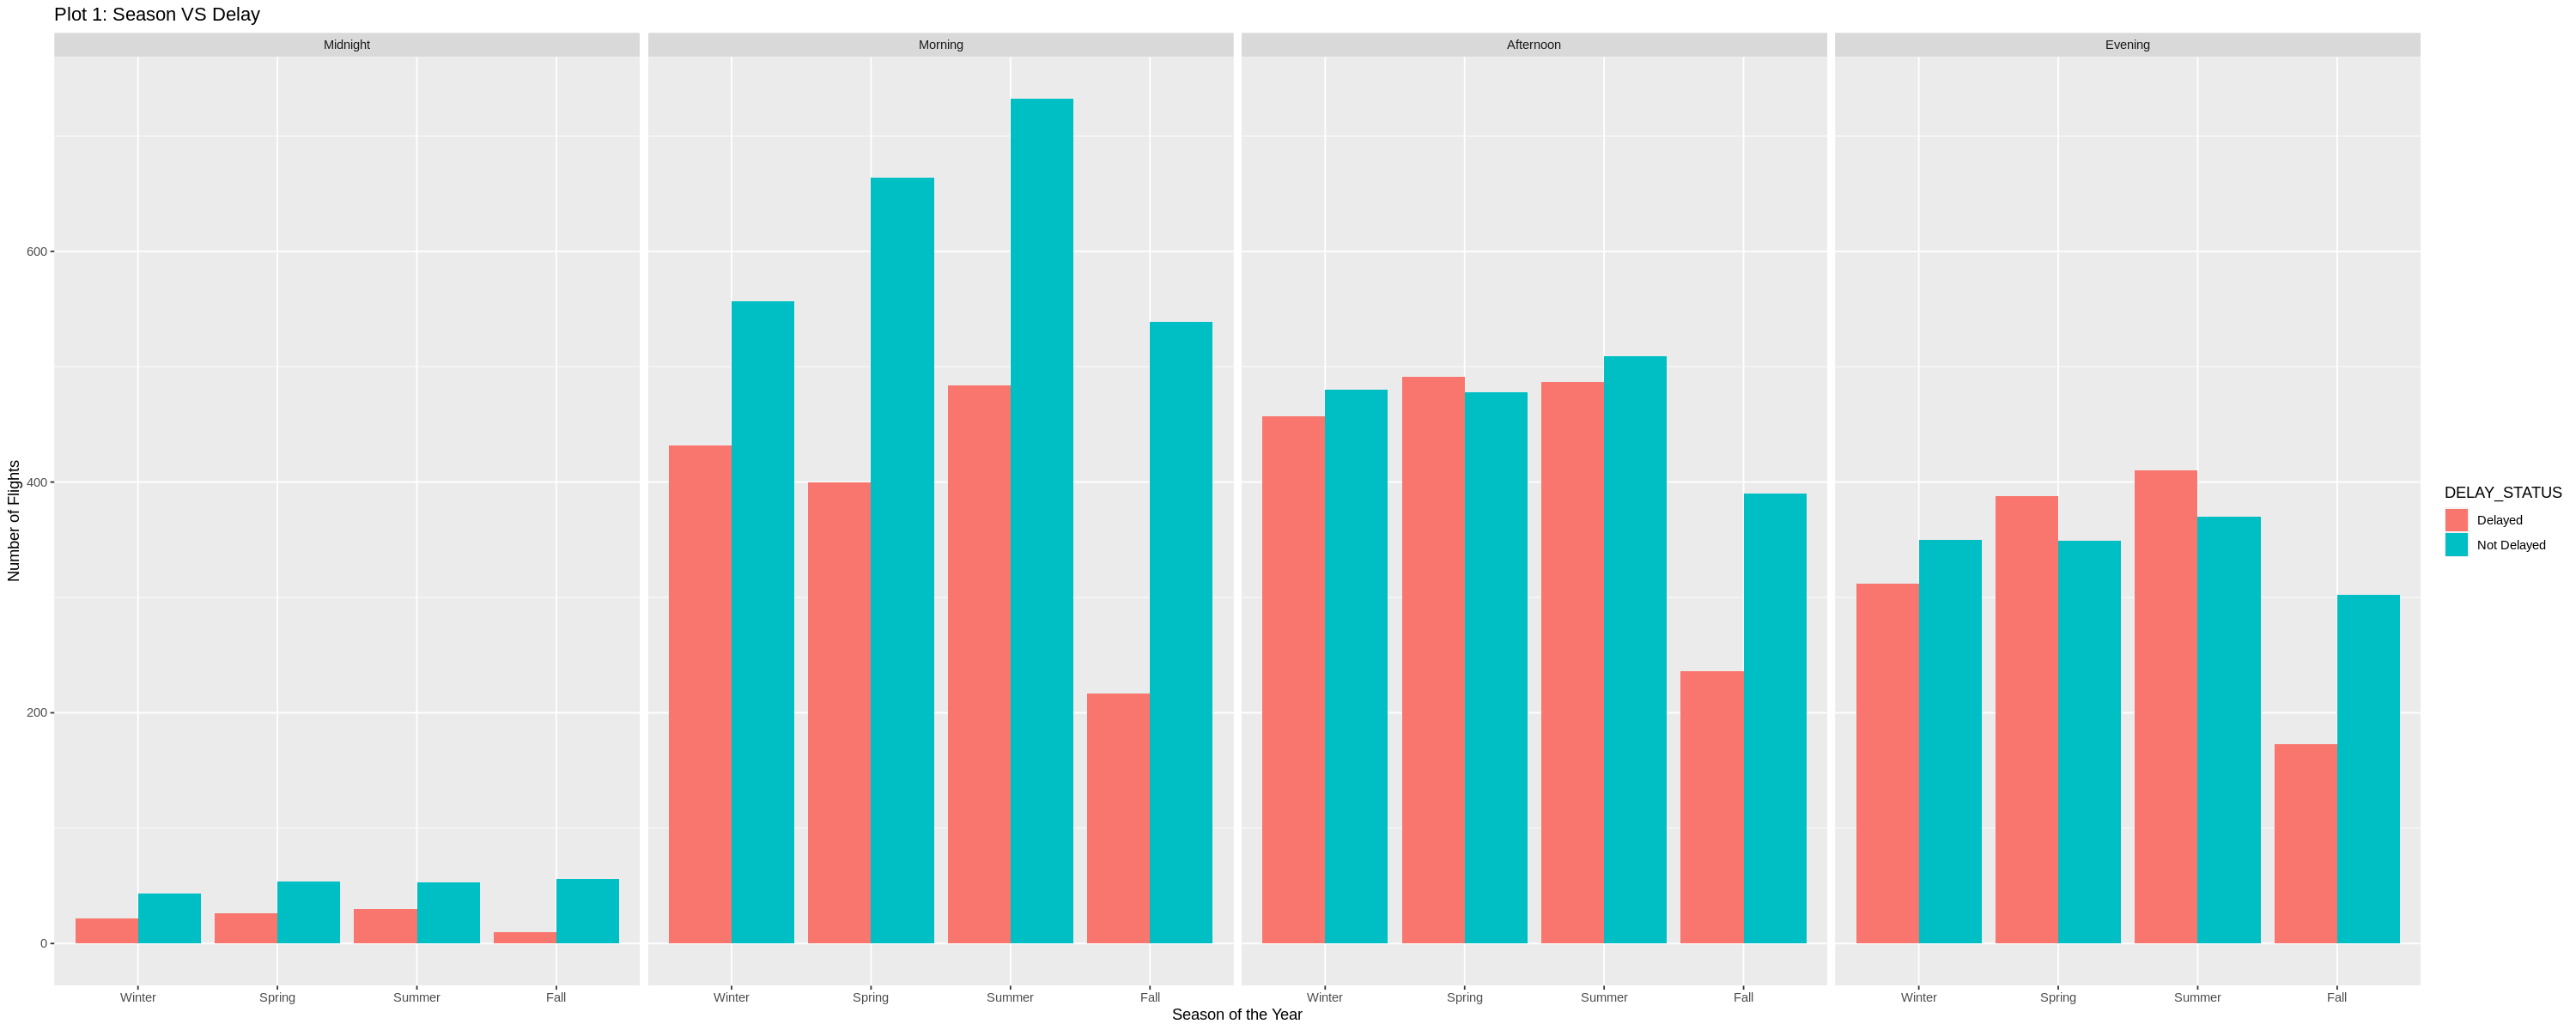

In [35]:
options(repr.plot.width = 25, repr.plot.height = 10) 
season_week_plot <- flights_train %>%
                    group_by(DELAY_STATUS,DEPARTURE_PART_OF_DAY,SEASON)%>%
                    summarise(n = n())%>%
        ggplot(aes(x = SEASON, y = n, fill = DELAY_STATUS)) + 
        geom_bar(stat = "identity",position = "dodge") +
        xlab("Season of the Year") +
        ylab("Number of Flights")+
        ggtitle("Plot 1: Season VS Delay") +
        facet_grid(~DEPARTURE_PART_OF_DAY)

season_week_plot

#### Reasons for using Plot 1 visulization
   

Our dataset we are analyzing is separated into four seasons and four time intervals for flights departing from the LAX airport.  In all time intervals, our scatter plot appears to form a negative quadratic relationship between the season and proportion of delayed flights.  “Winter” and “Midnight” have the lowest probability of flight delays out of all the seasons and time intervals respectively.  Through modelling the combination of factors “Season” and “Departure time of day”, flights at midnight in Winter appear to have the largest likelihood of arriving at the destination airport on time.


## Methods:

### Explain how you will conduct either your data analysis and which variables/columns you will use.
    We are building 3 new factors to categorize the given data: “Season” represents the four seasons of the year, “Weekday” represents either working days or weekends, and “Departure part of day” represents the time of day split into morning, afternoon, evening, and midnight.  Using these predictor variables, we want to build a classification model to predict whether or not these factors influence departure delay times.


### Describe at least one way that you will visualize the results
   One way we will visualize the results is through graphing the proportion of delayed flights for each of the seasons.  Our goal is to find out if there is a possible relationship between the departure date/time and the delay status of outgoing flights, so we will start off by modelling the delayed/on-time flights from each season.

## Expected outcomes and significance:
### What do you expect to find?
    Research question: Can we model a relationship between airplane delays and the departure dates/times?  In other words, do the different seasons, days of the week, and time of day make a difference in airplane delay time?

### What impact could such findings have?
    This analysis might be useful for people who are seeking to book a vacation and want to avoid long delays. In addition, this could be a good tool for people who have important events to attend and need to manage their schedule.  If not already implemented, this could also help airlines determine a new scheduling system that avoids long delays for their passengers. 

### What future questions could this lead to?
   For further research, we can expand our predictor variables to include the Airline as well to see if there is any correlation between that and flight delays.  This can help provide travellers insight on what the optimal airline to choose if they wish to avoid delays.


**===========================================================================================================================================================**

### Method (Improved)
   We ended up using more features than we factored in the proposal. That was due to the low accuricy caused by not having enough features with strong correlations. Hence, we disccused what features we did not include in the begenning, and ended up including `DESTINATION_AIRPORT`, `DISTANCE`, `TAXI_OUT`, `DEPARTURE_DELAY` as extra features. Here's some detailed explaination of these choicese and how would they help: <br><br>
  **`DESTINATION_AIRPORT`**:
  
  **`DISTANCE`**:
  
  
  
  **`DEPARTURE_DELAY`**: This is a more straight forward feature that includes all delays caused before takeoff. It really helps the model, as it is very related to weather the plane would be delayed at arrival. On the other hand, being delayed when takeoff does not imply the delay at arrival, so this feature is important and also makes sense for us to include.
  
Before including these 4 new features we were getting around 0.59 accuricy, which is not very good. After including these new features, we are able to achieve around 0.8, which is quite impressive considering the little amount of data we end up using, plus the nature of unpredictness of air travel.

In [69]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")
flights_train<- flights_train%>%
                select(DELAY_STATUS, DESTINATION_AIRPORT , SEASON , WEEKDAY , DEPARTURE_PART_OF_DAY, SCHEDULED_DEPARTURE,DISTANCE,TAXI_OUT,DEPARTURE_DELAY)

flights_train

knn_recipe <- recipe(DELAY_STATUS ~DEPARTURE_PART_OF_DAY+WEEKDAY+SEASON+DISTANCE+DEPARTURE_DELAY, data = flights_train)%>% #including new features mentioned
              step_center(DISTANCE)%>% 
              step_scale(DISTANCE)

knn_vfold <- vfold_cv(data = flights_train, v = 5, strata = DELAY_STATUS) #doing cross-validation

DELAY_STATUS,DESTINATION_AIRPORT,SEASON,WEEKDAY,DEPARTURE_PART_OF_DAY,SCHEDULED_DEPARTURE,DISTANCE,TAXI_OUT,DEPARTURE_DELAY
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Delayed,MIA,Spring,Weekday,Evening,2345,2342,23,3
Not Delayed,DFW,Fall,Weekend,Midnight,500,1235,12,-3
Not Delayed,ORD,Summer,Weekday,Afternoon,1310,1744,25,-2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Not Delayed,OAK,Spring,Weekday,Evening,1830,337,8,-5
Not Delayed,FAT,Spring,Weekend,Morning,935,209,22,-4
Not Delayed,JFK,Winter,Weekend,Morning,910,2475,23,-8


In [71]:
gridvals<- tibble(neighbors = seq(from = 1,to = 50,by = 1)) #check more neighbrous for higher test score

knn_results <- workflow() %>%
                 add_recipe(knn_recipe) %>%
                 add_model(knn_spec) %>%
                 tune_grid(resamples = knn_vfold, grid = gridvals) %>%
                 collect_metrics()

knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7079321,5,0.002251821,Model01
1,roc_auc,binary,0.7022569,5,0.002239684,Model01
2,accuracy,binary,0.7098367,5,0.002393290,Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
49,roc_auc,binary,0.8084697,5,0.004381119,Model49
50,accuracy,binary,0.7623073,5,0.002948772,Model50
50,roc_auc,binary,0.8076771,5,0.004279634,Model50


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7440235,5,0.005768039,Model01
2,accuracy,binary,0.7443092,5,0.005858248,Model02
3,accuracy,binary,0.7752596,5,0.002462150,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
48,accuracy,binary,0.7484050,5,0.002493628,Model48
49,accuracy,binary,0.7485003,5,0.001988991,Model49
50,accuracy,binary,0.7485955,5,0.001970688,Model50


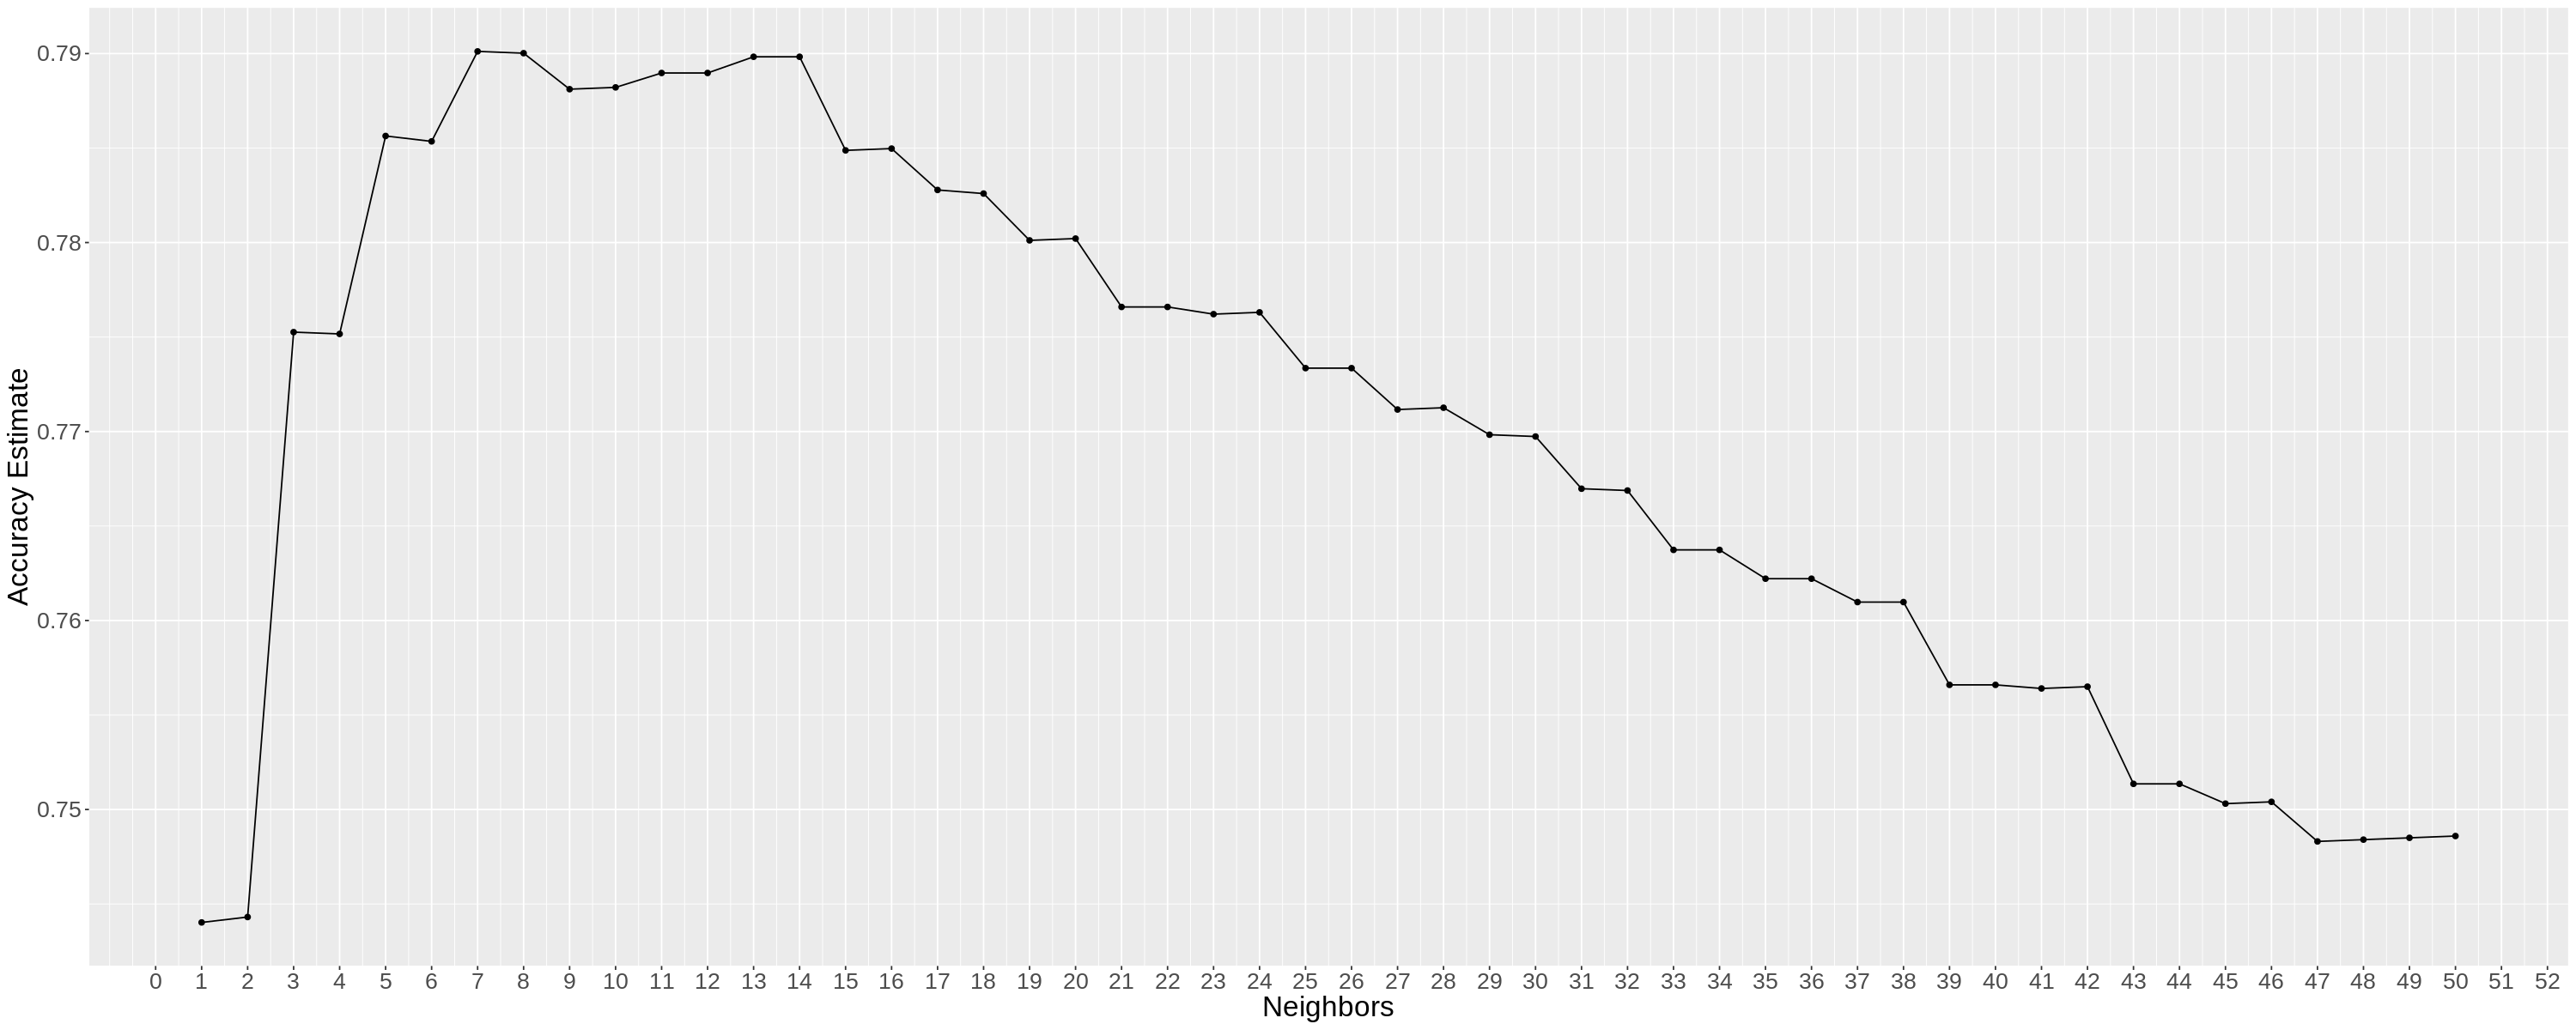

In [38]:
set.seed(102)
accuracies <- knn_results %>%
                 filter(.metric == 'accuracy')
accuracies

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 20))+
                  scale_x_continuous(breaks = seq(0, 100, by = 1))
cross_val_plot

In [48]:
knn_spec_new <- nearest_neighbor(weight_func = "rectangular", neighbors =7) %>%
            set_engine("kknn") %>%
            set_mode("classification")
flight_fit<- workflow()%>%
             add_recipe(knn_recipe)%>%
             add_model(knn_spec_new)%>%
             fit(data = flights_train)
flight_pred<- flight_fit%>%
              predict(flights_test)%>%
              bind_cols(flights_test)
flight_pred

.pred_class,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,⋯,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DELAY_STATUS,SEASON,WEEKDAY,DEPARTURE_PART_OF_DAY
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<fct>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>
Not Delayed,2015,5,4,1,US,598,N193UW,LAX,PHL,⋯,299,2402,1429,7,1436,1436,Delayed,Spring,Weekday,Morning
Not Delayed,2015,1,16,5,OO,2623,N866AS,LAX,SAN,⋯,26,109,0815,4,0832,0819,Not Delayed,Winter,Weekend,Morning
Delayed,2015,3,21,6,AA,2463,N5DVAA,LAX,DFW,⋯,148,1235,2341,4,2349,2345,Not Delayed,Spring,Weekend,Evening
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Delayed,2015,2,3,2,WN,2685,N605SW,LAX,MKE,⋯,214,1756,1611,5,1600,1616,Delayed,Winter,Weekday,Morning
Delayed,2015,3,31,2,OO,6296,N794SK,LAX,DFW,⋯,151,1235,0010,4,0016,0014,Not Delayed,Spring,Weekday,Evening
Not Delayed,2015,3,30,1,US,503,N831AW,LAX,PHX,⋯,57,370,0835,43,0905,0918,Delayed,Spring,Weekday,Morning


In [49]:
accuracy<-pred_combined%>%
          conf_mat(truth = DELAY_STATUS,estimate = .pred_class)

accuracy

             Truth
Prediction    Delayed Not Delayed
  Delayed        1202         200
  Not Delayed     758        2339

In [50]:
k_value<- accuracies%>%
          arrange(desc(mean))%>%
          slice(1)
k_value

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,accuracy,binary,0.790115,5,0.003445784,Model07


In [51]:
accuracy_compare<- flight_pred%>%
                   metrics(estimate = .pred_class,truth = DELAY_STATUS)
accuracy_compare

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7810625
kap,binary,0.5416587


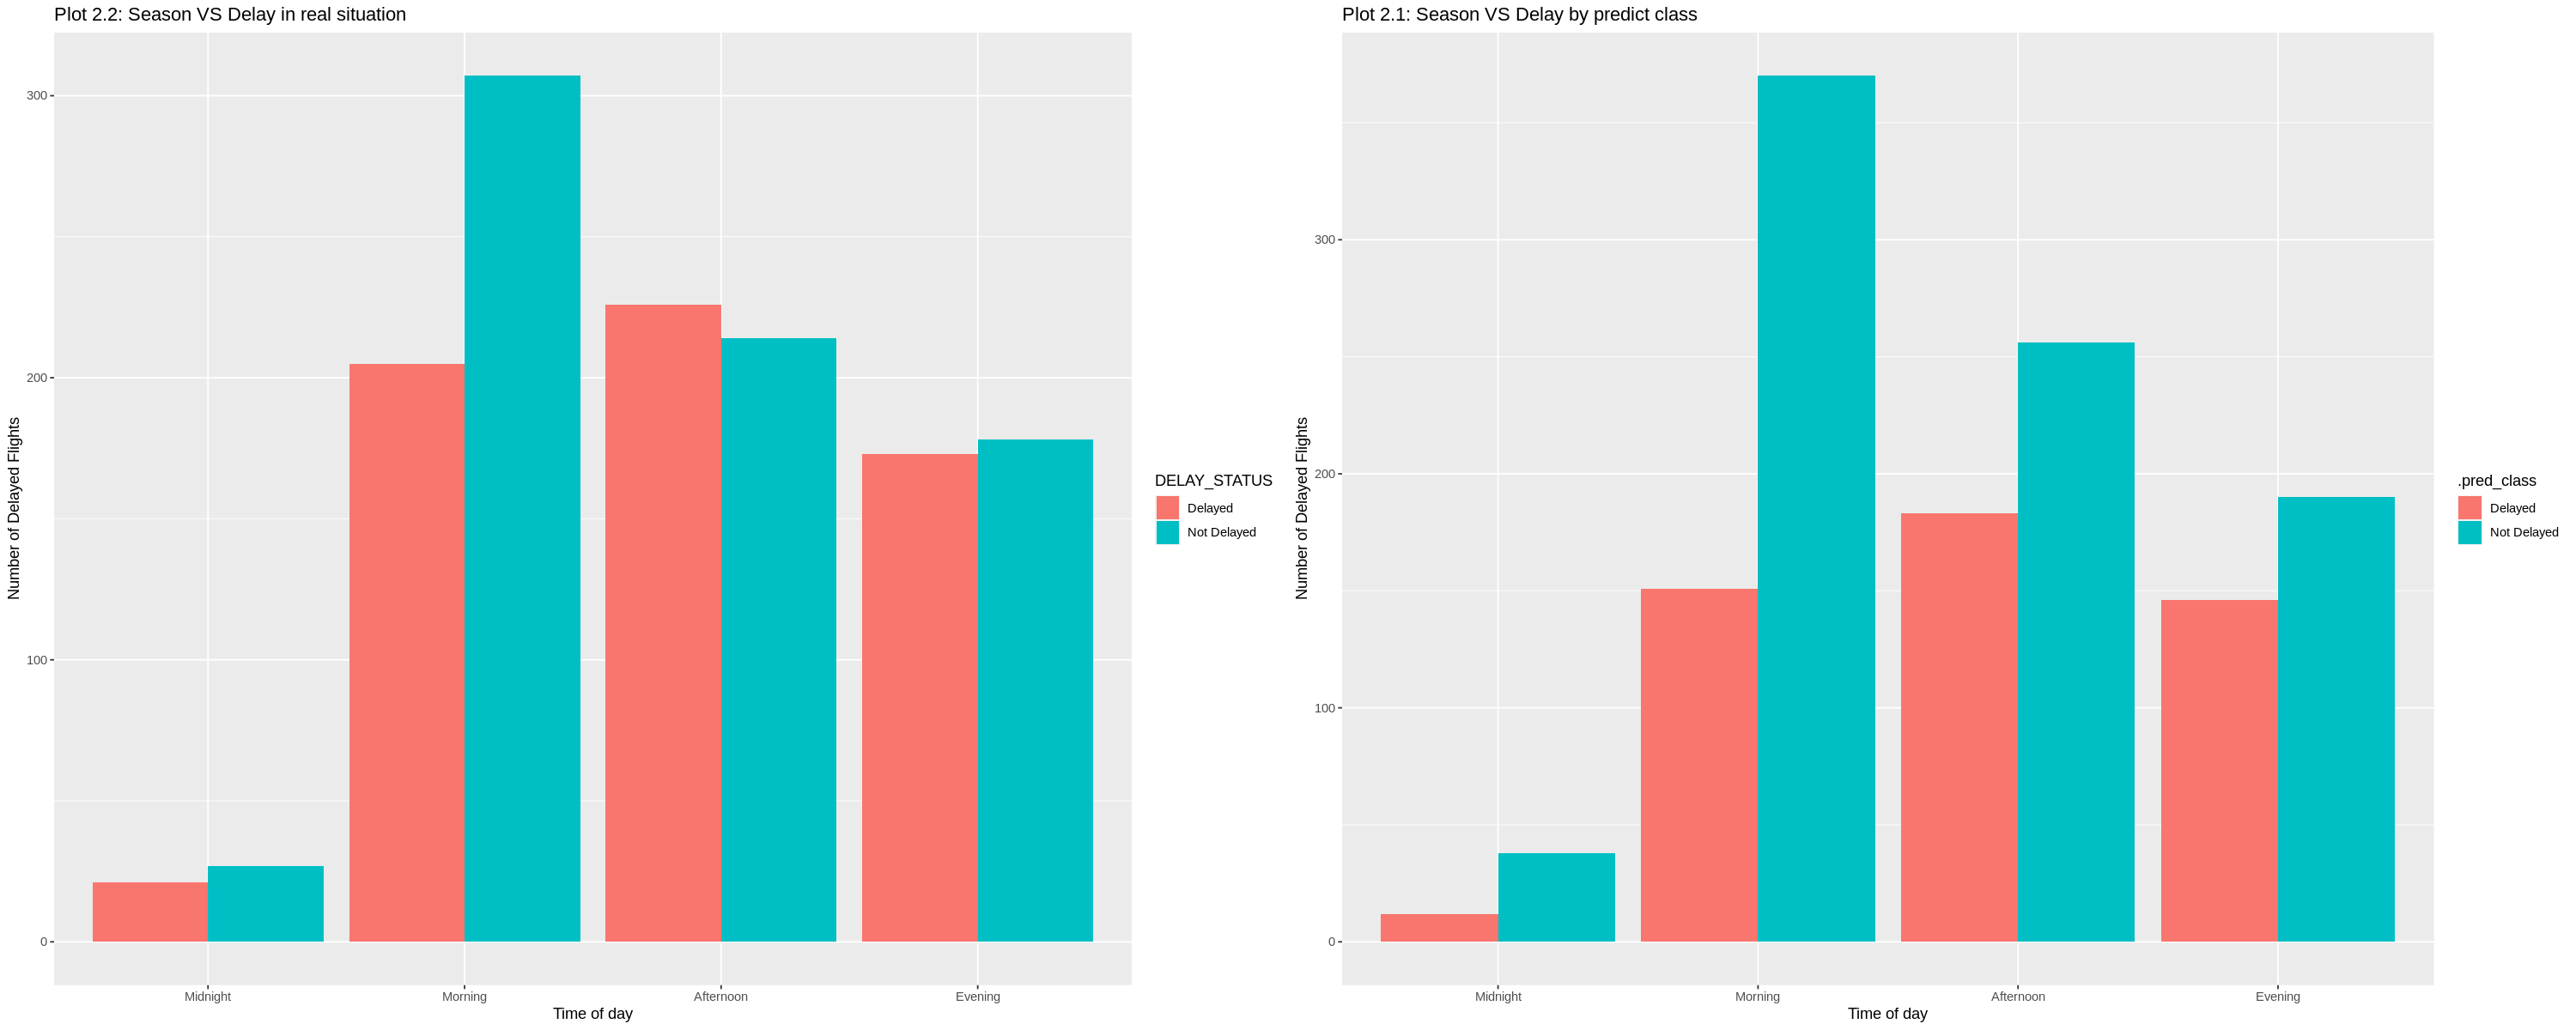

In [72]:
library(cowplot)
day_delay_pred <- flight_pred %>%
                    group_by(.pred_class,DEPARTURE_PART_OF_DAY,SEASON)%>%
                    summarise(n = n(),.groups = "drop")%>%
        ggplot(aes(x = DEPARTURE_PART_OF_DAY, y = n, fill = .pred_class)) + 
        geom_bar(stat = "identity",position = "dodge") +
        xlab("Time of day") +
        ylab("Number of Delayed Flights")+
        ggtitle("Plot 2.1: Season VS Delay by predict class")

day_delay_real <- flight_pred %>%
                    group_by(DELAY_STATUS,DEPARTURE_PART_OF_DAY,SEASON)%>%
                    summarise(n = n(),.groups = "drop")%>%
        ggplot(aes(x = DEPARTURE_PART_OF_DAY, y = n, fill = DELAY_STATUS)) + 
        geom_bar(stat = "identity",position = "dodge") +
        xlab("Time of day") +
        ylab("Number of Delayed Flights")+
        ggtitle("Plot 2.2: Season VS Delay in real situation")

               
plot_grid(day_delay_real, day_delay_pred, ncol=2)

$title
[1] "Plot 3: Part of the day VS delay plot"

attr(,"class")
[1] "labels"

$title
[1] "Plot 3: season VS delay plot"

attr(,"class")
[1] "labels"

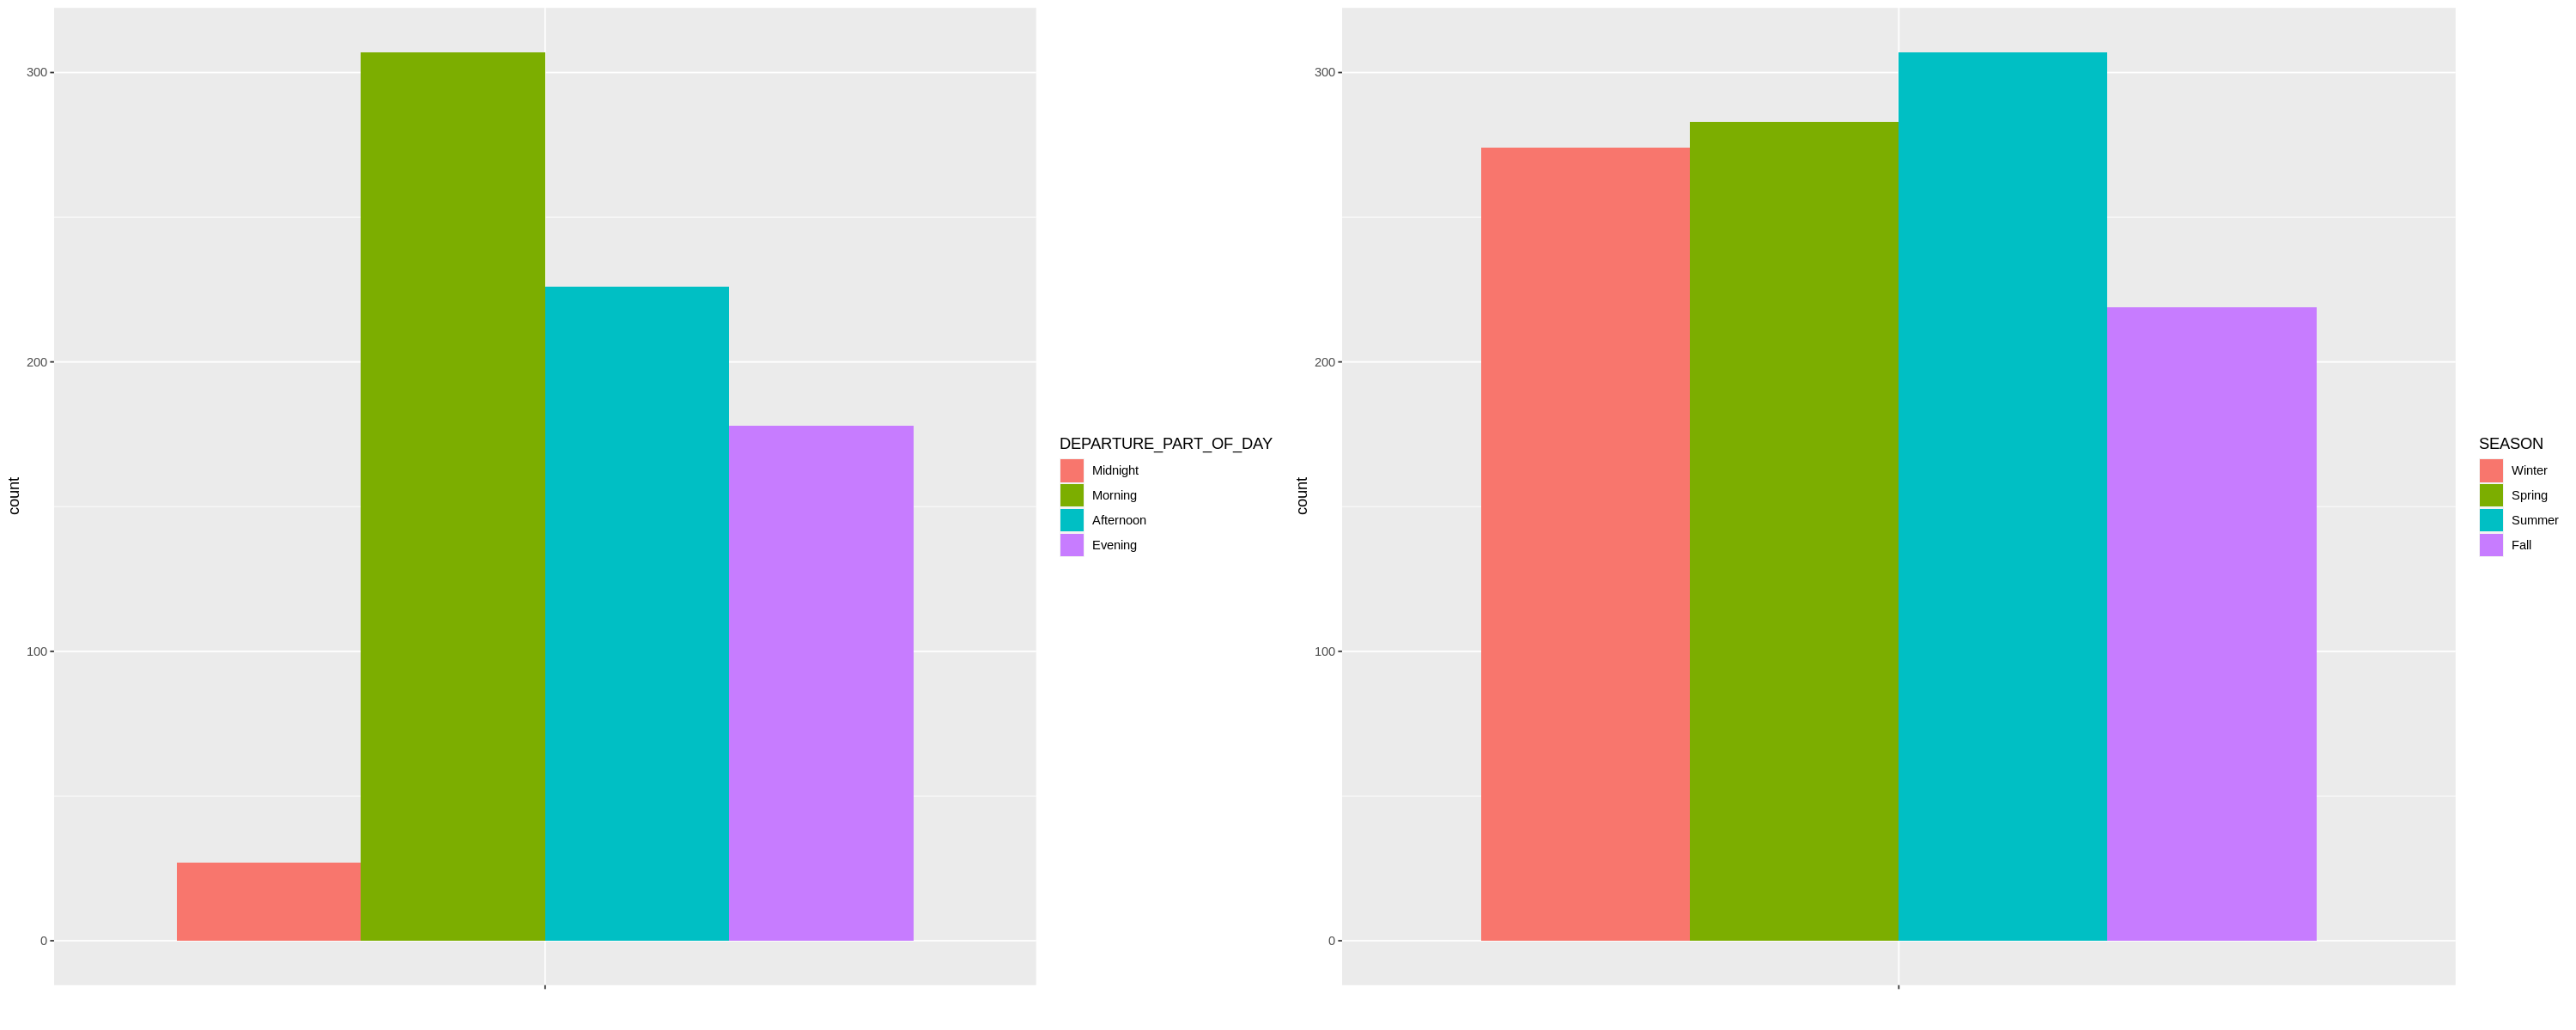

In [60]:
part_of_day_pie <- flight_pred %>%
                    group_by(DELAY_STATUS,DEPARTURE_PART_OF_DAY,SEASON)%>%
                    summarise(n = n(),.groups = "drop")%>%
                    ggplot(aes(x = "", y = n, fill = DEPARTURE_PART_OF_DAY)) + 
                    geom_bar(stat = "identity",position = "dodge") +
                    labs(x = " ", y = "count")
                    ggtitle("Plot 3: Part of the day VS delay plot")

season_pie <- flight_pred %>%
                    group_by(DELAY_STATUS,DEPARTURE_PART_OF_DAY,SEASON)%>%
                    summarise(n = n(),.groups = "drop")%>%
                    ggplot(aes(x = " ", y = n ,fill= SEASON)) + 
                    geom_bar(stat = "identity",position = "dodge")+
                    labs(x = "  ", y = "count")
                    ggtitle("Plot 3: season VS delay plot")
    

plot_grid(part_of_day_pie, season_pie, ncol=2)

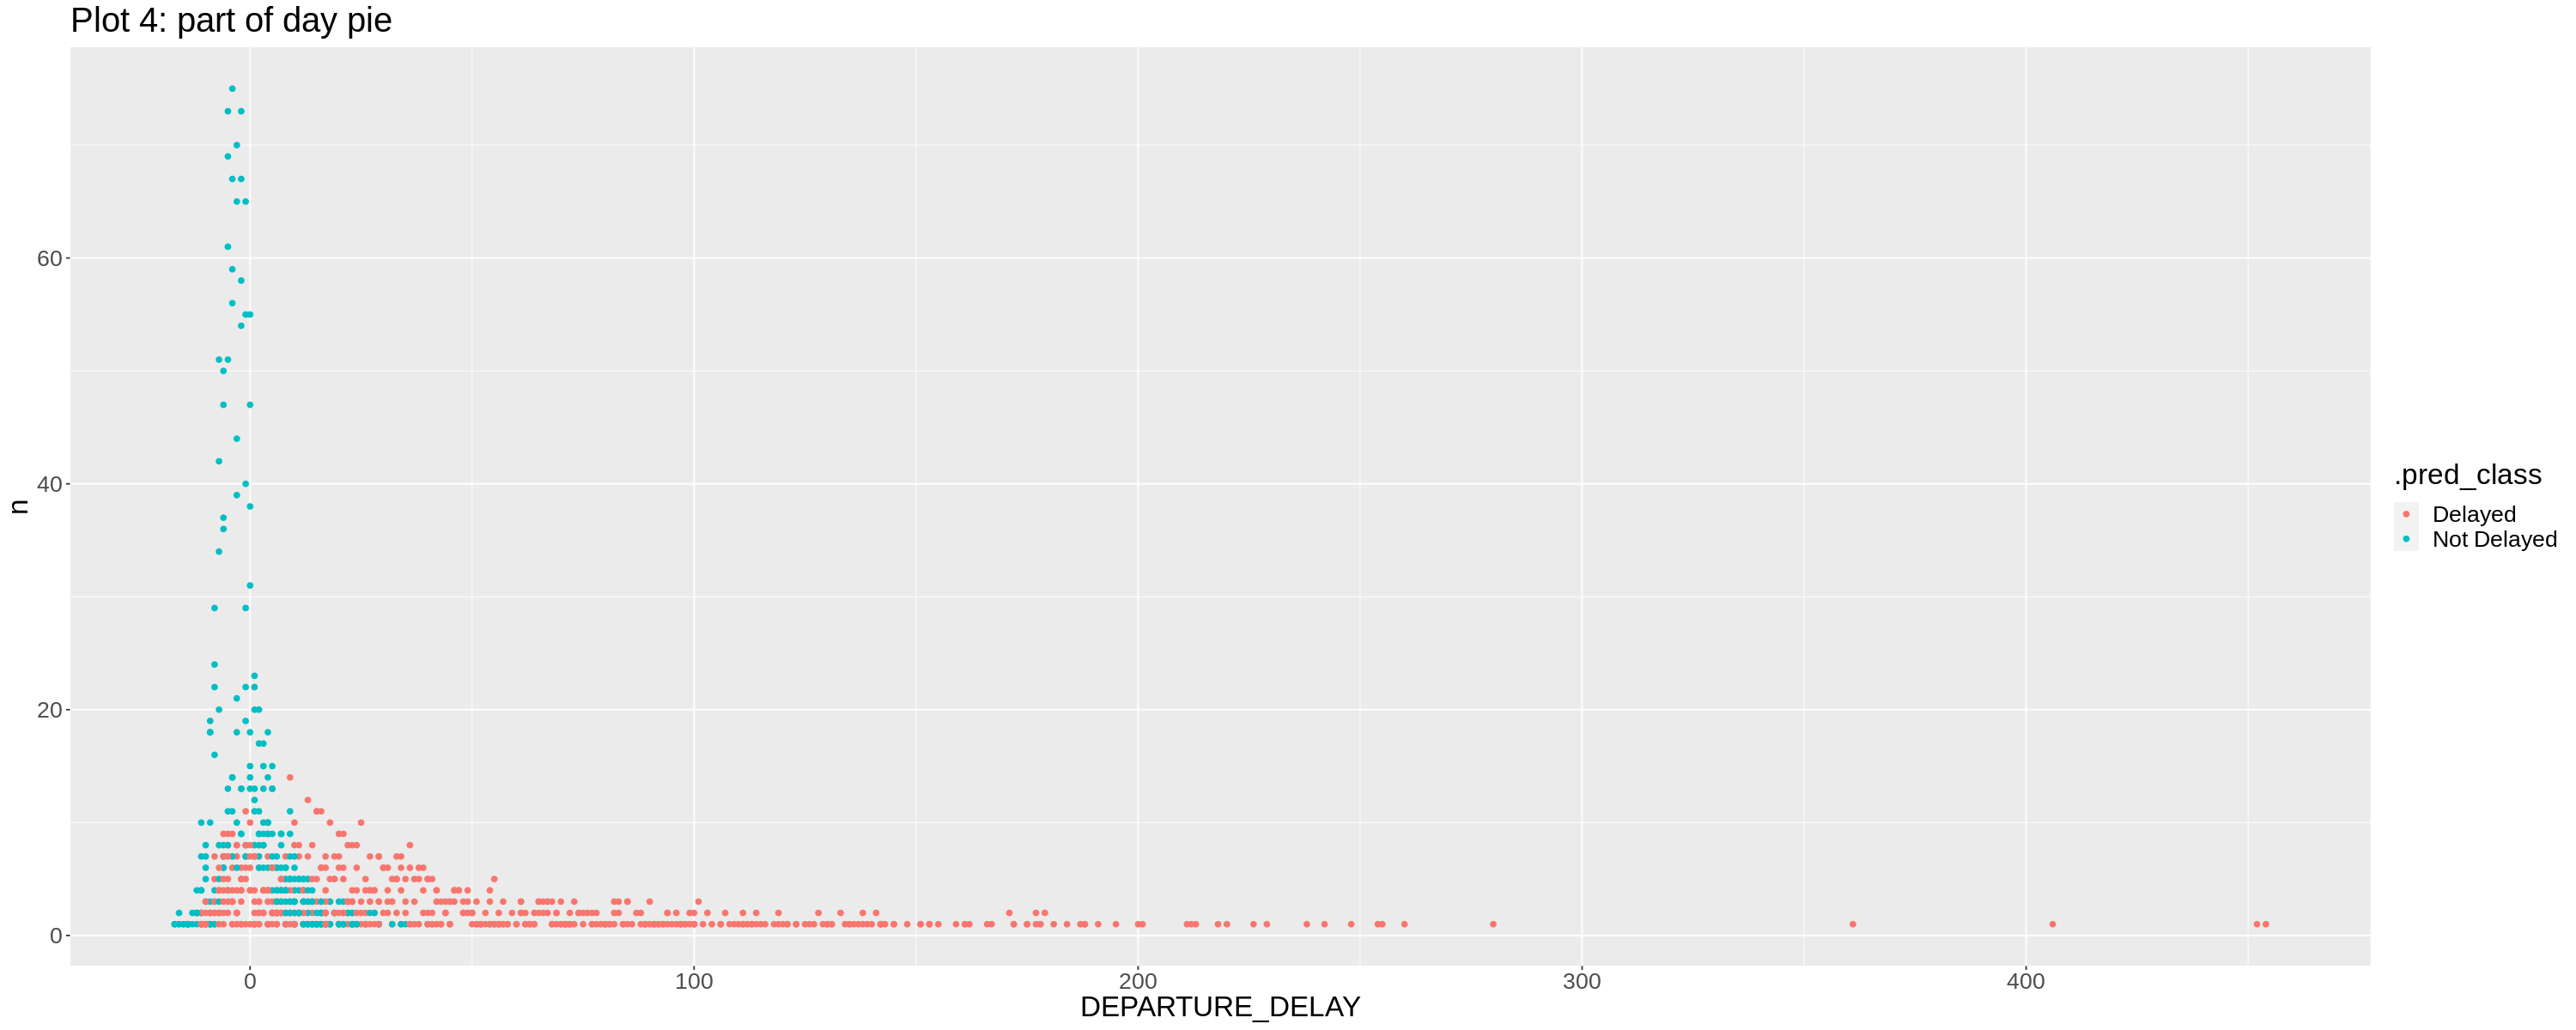

In [67]:
departure_delay_plot <- flight_pred %>%
                    group_by(DELAY_STATUS, SEASON, DEPARTURE_DELAY, .pred_class)%>%
                    summarise(n = n(),.groups = "drop")%>%
                    ggplot(aes(x = DEPARTURE_DELAY, y = n, colour = .pred_class)) + 
                    geom_point(stat = "identity") +
                    ggtitle("Plot 4: part of day pie")+
                    theme(text = element_text(size = 20))

departure_delay_plot